In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import laplace

In [15]:
c = plt.imread('C2-I61QTTA-CFbs_I61Q1ECM_0mMRGD_20x_001.tif')

In [16]:
c2 = c-np.min(c)
c2 = c2/np.max(c2)
d=c2>0.1
im=d

In [17]:
xi = np.linspace(0,1023,1024)
yi = np.linspace(0,1023,1024)
x,y = np.meshgrid(xi,yi)
sigma = 10
m = xi.shape[0]/2
n = yi.shape[0]/2

gfilt = 1-np.exp(-((x-m)**2+(y-n)**2)/(2*sigma**2))

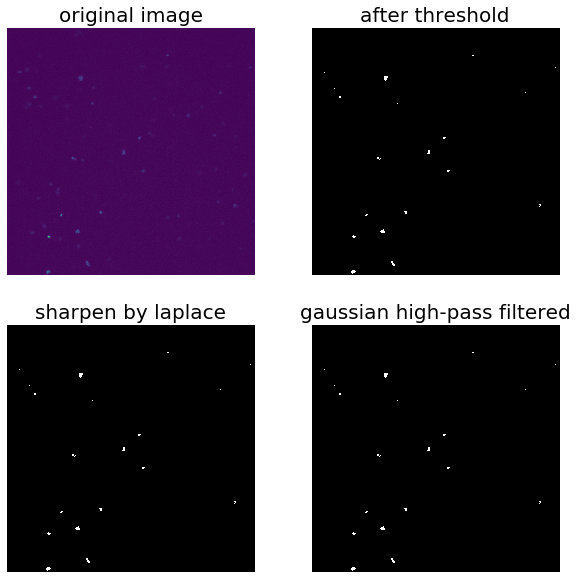

In [22]:
ims1 = laplace(im,ksize=10)#perform the laplace transform of the image
ims2 = im + 0.1*ims1

fim = np.fft.fft2(ims2) # Perform transform
fim2 = np.fft.fftshift(fim) # Center
fim3 = np.multiply(fim2, gfilt) # Multiply by filter function
fim4 = np.fft.ifftshift(fim3) # Un-center
im2 = np.real(np.fft.ifft2(fim4)) # Perform inverse transform



fig, ax = plt.subplots(2,2, figsize=(10, 10))

ax[0][0].imshow(c)
ax[0][1].imshow(im, cmap=plt.cm.get_cmap('gray',2))
ax[1][0].imshow(ims2, cmap=plt.cm.get_cmap('gray',2))
ax[1][1].imshow(im2, cmap=plt.cm.get_cmap('gray',2))

ax[0][0].set_title('original image',fontsize=20)
ax[0][1].set_title('after threshold',fontsize=20)
ax[1][0].set_title('sharpen by laplace',fontsize=20)
ax[1][1].set_title('gaussian high-pass filtered',fontsize=20)

for i in [0,1]:
    for j in [0,1]:
        ax[i][j].axis('off')

